In [21]:
#-----------------------------------------
# Title:  Decision Tree Multi-Class Prediction of Obesity Risk Dataset
# Subtitle: DDS-8555, Assignment 6
# Author: Madgene Moise
# Date: Sunday, June 22, 2025
#-----------------------------------------

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the training and testing datasets

train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# Inspect columns
train_df.head(), test_df.head()

(   id  Gender        Age    Height      Weight family_history_with_overweight  \
 0   0    Male  24.443011  1.699998   81.669950                            yes   
 1   1  Female  18.000000  1.560000   57.000000                            yes   
 2   2  Female  18.000000  1.711460   50.165754                            yes   
 3   3  Female  20.952737  1.710730  131.274851                            yes   
 4   4    Male  31.641081  1.914186   93.798055                            yes   
 
   FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
 0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
 1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
 2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
 3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
 4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
 
         TUE       CALC                 MTRANS           NObeyesda

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')

encoders = {col: LabelEncoder().fit(train_df[col]) for col in categorical_cols + ['NObeyesdad']}

# Inspect unique categories
for col in categorical_cols:
    print(f"{col}: Train -> {train_df[col].unique()}, Test -> {test_df[col].unique()}")

Gender: Train -> ['Male' 'Female'], Test -> ['Male' 'Female']
family_history_with_overweight: Train -> ['yes' 'no'], Test -> ['yes' 'no']
FAVC: Train -> ['yes' 'no'], Test -> ['yes' 'no']
CAEC: Train -> ['Sometimes' 'Frequently' 'no' 'Always'], Test -> ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: Train -> ['no' 'yes'], Test -> ['no' 'yes']
SCC: Train -> ['no' 'yes'], Test -> ['no' 'yes']
CALC: Train -> ['Sometimes' 'no' 'Frequently'], Test -> ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS: Train -> ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'], Test -> ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


In [31]:
# Use pandas get_dummies instead
X_train = pd.get_dummies(train_df.drop(['id', 'NObeyesdad'], axis=1))
X_test = pd.get_dummies(test_df.drop(['id'], axis=1))

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

y_train = train_df['NObeyesdad']

In [32]:
# Fit Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

tree_rules = export_text(dt_model, feature_names=list(X_train.columns))
train_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

tree_rules, train_report, train_cm

('|--- Weight <= 99.54\n|   |--- Weight <= 76.04\n|   |   |--- Weight <= 55.00\n|   |   |   |--- Height <= 1.64\n|   |   |   |   |--- Weight <= 46.83\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |--- Weight >  46.83\n|   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |--- Height >  1.64\n|   |   |   |   |--- Height <= 1.70\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |--- Height >  1.70\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |--- Weight >  55.00\n|   |   |   |--- Weight <= 61.11\n|   |   |   |   |--- Height <= 1.70\n|   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |--- Height >  1.70\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |--- Weight >  61.11\n|   |   |   |   |--- Height <= 1.74\n|   |   |   |   |   |--- class: Overweight_Level_I\n|   |   |   |   |--- Height >  1.74\n|   |   |   |   |   |--- class: Normal_Weight\n|   |--- Weight >  76.04\n|   |   |--- Height <= 1.65

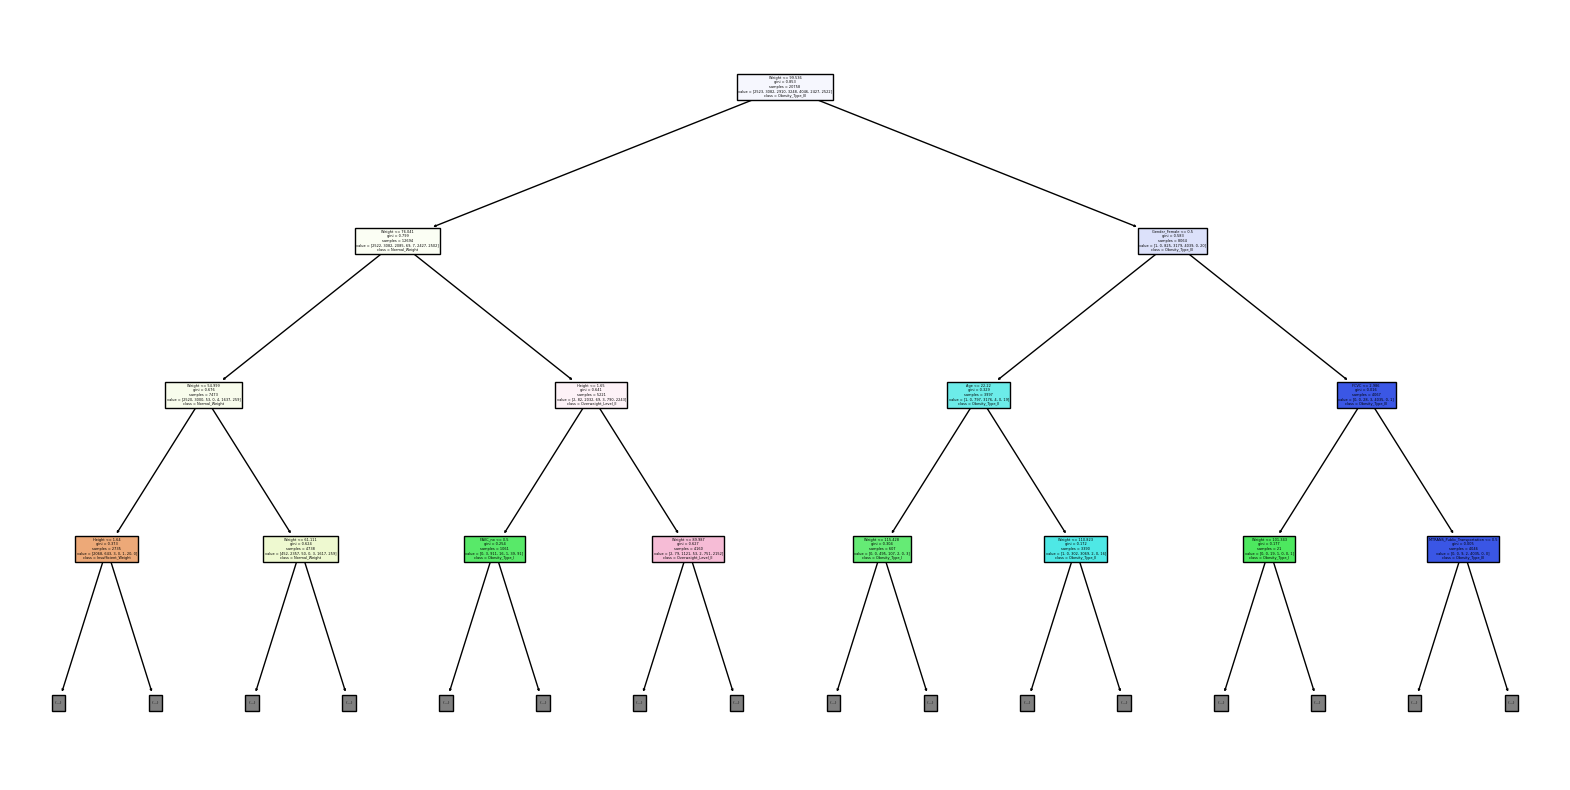

In [33]:
# Plot decision tree for visualization
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=encoders['NObeyesdad'].classes_, filled=True, max_depth=3)
plt.show()

Model:
* Built a Decision Tree (max depth = 5) using the train.csv data to predict NObeyesdad.
* Used get_dummies for robust encoding of categorical variables. 

Findings:
* The tree primarily splits on Weight, Height, and a few categorical flags like FAVC (frequent consumption of high-calorie food).
* The tree captures clear thresholds where weight and height strongly distinguish between normal, overweight, and obesity types.
* Depth limit helps prevent overfitting.

Visual Inspection:
* The image shown is the top of the tree: One can observe clear rules based on Weight and Height.

Performance on Training Data: 
* Overall accuracy: about 84%
* Obesity_Type_III and Obesity_Type_II are predicted with very high precision and recall.
* Some overlap for Normal_Weight versus Overweight_Level_I.

Assumptions Checked: 
* Decision Trees do not require linearity or normality.
* Model interpretability is high, and decision paths are explicit.

In [34]:

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'NObeyesdad': y_test_pred
})

submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
